In [1]:
using Random
using Distributions
using Plots

Random.seed!(1234);
gr();

In [ ]:
include("./feature/polynomial_features.jl")
include("./linear/linear_regressor.jl")
using .polynomial_features
using .linear_regressor

In [12]:
function create_toy_data(func, sample_size, std)
    x = range(0, stop=1.0, length=sample_size)
    noise = rand(Normal(0.0, std), sample_size)
    return x, func(x) + noise
end

function sinusoidal(x)
    return sin.(2 * pi * x)
end

sinusoidal (generic function with 1 method)

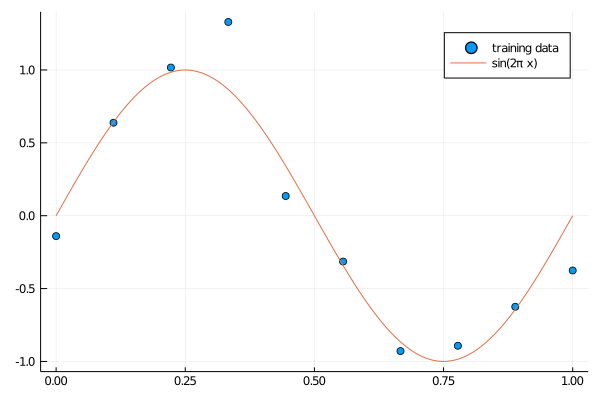

In [13]:
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25);
x_test = range(0, stop=1.0, length=100);
y_test = sinusoidal(x_test);

plot(x_train, y_train, seriestype=:scatter, label="training data", legend=:topright)
plot!(x_test, y_test, label="sin(2π x)")

In [10]:
feature = PolynomialFeature(9);
X_train = transform(feature, x_train);
X_test = transform(feature, x_test);
x = range(0, stop=1.0, length=10);
model = LinearRegressor([0], 0);
fitting(model, X_train, y_train);
y, y_std = predict(model, X_test);

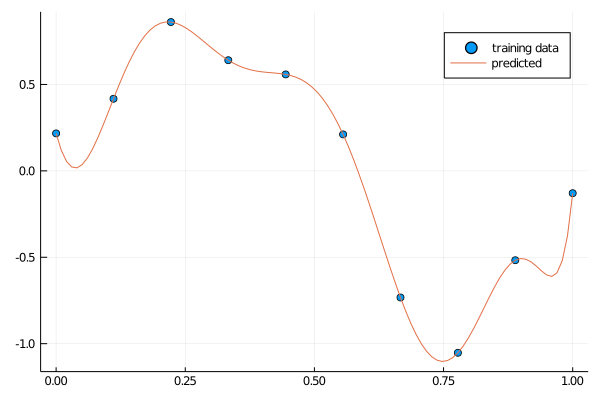

In [11]:
plot(x_train, y_train, seriestype=:scatter, label="training data", legend=:topright)
plot!(x_test, y, label="predicted")